# Especialización en Analítica y Ciencia de Datos
### Monografía
### Gestión de datos

## _Clasificación de la desnutrición e inseguridad alimentaria en población infantil de los hogares del departamento de Antioquia, Colombia: un enfoque utilizando aprendizaje automático._

**Autores**\
Huberth Rolando Hincapié Arango\
Yeisson Alejandro Gutiérrez Cano

# Herramientas

## Librerías

In [ ]:
# Datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt

# Matemáticas y estadísticas
# ==============================================================================
import math
from collections import Counter

# Exportar datos
# ==============================================================================
from google.colab import files



# Procesamiento de datos

## Importación de datos

In [ ]:
!gdown '12AMhKRv6LOYgSduVF_OHAncPcYQLosdW' -O /tmp/BDIndicadores.csv

Downloading...
From: https://drive.google.com/uc?id=12AMhKRv6LOYgSduVF_OHAncPcYQLosdW
To: /tmp/BDIndicadores.csv
100% 43.1M/43.1M [00:01<00:00, 32.3MB/s]


In [ ]:
baseCompleta = pd.read_csv('/tmp/BDIndicadores.csv', encoding='ISO-8859-1', sep=';')
col_names = baseCompleta.columns.tolist()

# se podrían requerir los campos de SUBREGION para agregar info: 'Código subregión', 'Subregión',
dataset = baseCompleta[[ 'Código entidad', 'Entidad', 'Año', 'Indicador', 'Valor']]

In [ ]:
print(col_names)

['Desagregación', 'Código subregión', 'Subregión', 'Código entidad', 'Entidad', 'Pilar', 'Número ODS', 'Nombre ODS', 'Número meta', 'Nombre meta', 'Número indicador', 'Indicador', 'Valor', 'Numerador', 'Denominador', 'Año', 'Fuente', 'Unidad de medida']


In [ ]:
# Visualizar Base completa
baseCompleta.count()

Desagregación       135386
Código subregión    135386
Subregión           135386
Código entidad      135386
Entidad             135386
Pilar               135386
Número ODS          135386
Nombre ODS          135386
Número meta         135386
Nombre meta         135386
Número indicador    135386
Indicador           135386
Valor               135231
Numerador           135211
Denominador         133749
Año                 135386
Fuente              135386
Unidad de medida    135386
dtype: int64

In [ ]:
# Visualizar dataset seleccionado
dataset

,Código entidad,Entidad,Año,Indicador,Valor
0,5674,San Vicente Ferrer,2019,Incidencia de la pobreza monetaria extrema,17.961425
1,5004,Abriaquí,2019,Incidencia de la pobreza monetaria extrema,11.345543
2,5591,Puerto Triunfo,2019,Incidencia de la pobreza monetaria extrema,5.830037
3,5792,Tarso,2019,Incidencia de la pobreza monetaria extrema,5.754092
4,5138,Cañasgordas,2019,Incidencia de la pobreza monetaria extrema,18.005586
...,...,...,...,...,...
135381,5138,Cañasgordas,2013,Penetración de internet fijo,2.819268
135382,5038,Angostura,2013,Penetración de internet fijo,1.757997
135383,5607,El Retiro,2013,Penetración de internet fijo,16.332712
135384,5051,Arboletes,2013,Penetración de internet fijo,2.165878


In [ ]:
dataset.describe()

,Código entidad,Año,Valor
count,135386.000000,135386.000000,135231.000000
mean,5415.745830,2016.340308,235.605429
std,279.712332,3.624304,5043.463902
min,5001.000000,2007.000000,-195.173828
25%,5147.000000,2013.000000,0.000000
50%,5376.000000,2017.000000,16.279070
75%,5659.000000,2019.000000,58.473736
max,5895.000000,2022.000000,420374.293800


In [ ]:
# Visualizar dataset inicial
dataset.count()

Código entidad    135386
Entidad           135386
Año               135386
Indicador         135386
Valor             135231
dtype: int64

In [ ]:
# Pivoteo de los datos
df_pivot = dataset.pivot_table(index = ['Código entidad', 'Entidad', 'Año'], columns = 'Indicador', values = 'Valor').reset_index()
# Eliminar la columna 'index'
#df_pivot.drop(columns=['index'], inplace=True)
df_pivot

Indicador,Código entidad,Entidad,Año,Brecha de ingreso mensual promedio entre hombres y mujeres,Brecha de pobreza extrema urbano-rural,Brecha entre cobertura neta urbano-rural en educación básica y media,Capacidad instalada de generación de energía eléctrica,Cobertura de establecimientos financieros,Cobertura de vacunación con BCG en nacidos vivos,Cobertura de viviendas con agua potable,...,Tasa de violencia de pareja,Tasa de víctimas (directas e indirectas) de homicidio o desaparición forzada registradas en el Registro Único de Víctimas,Valor agregado de la industria manufacturera,Valor de ingresos laborales como porcentaje del Producto Interno Bruto (PIB),Vehículos eléctricos e híbridos matriculados,Índice de Pobreza Multidimensional (IPM),Índice de bancarización,Índice de riesgo de la calidad del agua (IRCA),Índice de riesgo de la calidad del agua (IRCA) Rural,Índice de riesgo de la calidad del agua (IRCA) Urbano
0,5001,Medellín,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001,Medellín,2010,NaN,NaN,-24.521204,7.03,3.746016,110.815615,NaN,...,NaN,32.760797,10193.737870,NaN,4.272340,NaN,84.223668,0.600000,3.100750,0.420000
2,5001,Medellín,2011,NaN,NaN,-29.127469,7.03,6.570680,116.438727,NaN,...,NaN,39.077518,11268.531860,NaN,3.939082,NaN,93.385783,0.600000,3.501125,0.530000
3,5001,Medellín,2012,NaN,NaN,-38.959540,7.03,11.244419,115.130513,NaN,...,17.788743,24.233607,11131.966200,NaN,3.692916,NaN,94.080123,0.600000,0.600000,0.400000
4,5001,Medellín,2013,19.381305,1.658296,-38.277198,7.03,13.800588,106.594602,98.227862,...,76.033269,14.777441,11970.134940,NaN,3.469120,NaN,100.029149,0.600000,3.600000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,5895,Zaragoza,2018,NaN,NaN,16.046090,0.00,25.616173,36.210526,31.154890,...,60.578525,68.962720,19.566562,28.884945,0.000000,NaN,8.190252,41.820497,90.700000,15.900000
1749,5895,Zaragoza,2019,26.316477,1.219498,13.473454,0.00,35.002693,34.375000,26.433606,...,89.020772,83.300278,18.942080,29.321239,0.000000,36.345757,7.599623,42.644944,90.721475,16.335120
1750,5895,Zaragoza,2020,NaN,NaN,28.803033,0.00,81.290067,37.701149,35.906572,...,176.159718,51.340784,12.833172,30.552785,0.000000,NaN,8.135616,43.470102,90.721475,17.588626
1751,5895,Zaragoza,2021,-3.026480,1.095764,22.492464,0.00,108.504970,43.230404,0.000000,...,159.559037,19.592476,14.846039,NaN,0.000000,30.949200,7.114547,47.193502,92.175355,24.700000


In [ ]:
df_pivot.describe()

Indicador,Código entidad,Año,Brecha de ingreso mensual promedio entre hombres y mujeres,Brecha de pobreza extrema urbano-rural,Brecha entre cobertura neta urbano-rural en educación básica y media,Capacidad instalada de generación de energía eléctrica,Cobertura de establecimientos financieros,Cobertura de vacunación con BCG en nacidos vivos,Cobertura de viviendas con agua potable,Cobertura de viviendas con agua potable (rural),...,Tasa de violencia de pareja,Tasa de víctimas (directas e indirectas) de homicidio o desaparición forzada registradas en el Registro Único de Víctimas,Valor agregado de la industria manufacturera,Valor de ingresos laborales como porcentaje del Producto Interno Bruto (PIB),Vehículos eléctricos e híbridos matriculados,Índice de Pobreza Multidimensional (IPM),Índice de bancarización,Índice de riesgo de la calidad del agua (IRCA),Índice de riesgo de la calidad del agua (IRCA) Rural,Índice de riesgo de la calidad del agua (IRCA) Urbano
count,1753.000000,1753.000000,497.000000,497.000000,1625.000000,1625.000000,1625.000000,1625.000000,1125.000000,1125.000000,...,1375.000000,1625.000000,1625.000000,500.000000,1625.000000,372.000000,1625.000000,1500.000000,1475.000000,1488.000000
mean,5416.185967,2015.363377,9.625440,1.631606,35.824398,39.768398,33.179910,52.428473,48.562717,13.419775,...,132.129217,39.035616,218.530680,33.015559,31.800014,18.957543,32.984906,22.737698,56.168577,4.718328
std,279.771073,4.286642,22.760642,2.854714,51.806436,168.592471,34.788462,58.710376,25.455504,21.987530,...,124.085756,103.425452,1076.632002,4.355538,130.759172,10.771114,34.489036,18.827139,31.062479,13.810602
min,5001.000000,2007.000000,-155.116244,0.000000,-195.173828,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.083089,18.877363,0.000000,1.264837,0.000000,0.000000,0.000000,0.000000
25%,5147.000000,2012.000000,2.248253,0.408716,8.895973,0.000000,8.841733,20.952381,33.039389,0.000000,...,45.320646,0.000000,7.892571,30.609675,0.000000,10.960123,10.297801,8.975000,32.805749,0.000000
50%,5376.000000,2016.000000,12.597277,1.064066,33.019733,0.000000,21.685943,36.231884,48.419261,1.209329,...,100.082677,0.000000,18.568569,32.948138,0.000000,16.654328,19.712033,18.900000,56.181541,0.880000
75%,5659.000000,2019.000000,22.598975,1.746349,58.407160,0.900000,45.474549,66.086957,64.761162,17.831814,...,188.042554,33.352789,47.696393,35.651828,0.000000,25.045718,45.336491,32.914224,85.202500,2.940000
max,5895.000000,2022.000000,64.527276,43.827010,418.117170,1466.900000,299.227799,597.727273,99.860009,99.400000,...,1256.106071,1453.957997,12209.622490,52.332404,2344.166223,56.413569,255.521760,100.000000,100.000000,100.000000


In [ ]:
col_names = df_pivot.columns.tolist()
i = 0
#crear el diccionario
dictVars = {}
for c in col_names:
    if c == 'Incidencia de desnutrición aguda en población menor de 5 años':
        df_pivot.rename(columns = {c: 'O1'}, inplace = True)
        dictVars.update({'O1': c})
    elif c == 'Prevalencia de inseguridad alimentaria en el hogar (moderada o severa)':
        df_pivot.rename(columns = {c: 'O2'}, inplace = True)
        dictVars.update({'O2': c})
    elif c not in {'Código entidad', 'Entidad', 'Año'}:
        df_pivot.rename(columns = {c: 'V' + str(i)}, inplace = True)
        dictVars.update({'V' + str(i): c})
        i+=1
    elif c in {'Código entidad'}:
        df_pivot.rename(columns = {c: 'CodDane'}, inplace = True)
    elif c in {'Entidad'}:
        df_pivot.rename(columns = {c: 'Mpio'}, inplace = True)

#reordenar las columnas del dataframe: [AtributosDeIdentification]+[Año]+[96_Vars]+[Salidas]
# Lista con el nuevo orden de las columnas

#separar los conjuntos de variables
vIdentificacion = ['CodDane', 'Mpio']
vPrediccion =  [f'V{i}' for i in range(96)]
vSalida = ['O1', 'O2']

#new_columns_order = ['CodDane', 'Mpio', 'Año'] + [f'V{i}' for i in range(96)] + ['O1', 'O2']
new_columns_order = vIdentificacion + ['Año'] + vPrediccion + vSalida
# Reordenar las columnas del DataFrame
df_pivot = df_pivot[new_columns_order]

col_names = df_pivot.columns.tolist()
print(col_names)

['CodDane', 'Mpio', 'Año', 'V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'O1', 'O2']


In [ ]:
df_pivot.describe()

Indicador,CodDane,Año,V0,V1,V2,V3,V4,V5,V6,V7,...,V88,V89,V90,V91,V92,V93,V94,V95,O1,O2
count,1753.000000,1753.000000,497.000000,497.000000,1625.000000,1625.000000,1625.000000,1625.000000,1125.000000,1125.000000,...,1625.000000,500.000000,1625.000000,372.000000,1625.000000,1500.000000,1475.000000,1488.000000,750.000000,500.000000
mean,5416.185967,2015.363377,9.625440,1.631606,35.824398,39.768398,33.179910,52.428473,48.562717,13.419775,...,218.530680,33.015559,31.800014,18.957543,32.984906,22.737698,56.168577,4.718328,227.491591,26.651671
std,279.771073,4.286642,22.760642,2.854714,51.806436,168.592471,34.788462,58.710376,25.455504,21.987530,...,1076.632002,4.355538,130.759172,10.771114,34.489036,18.827139,31.062479,13.810602,295.224568,13.882069
min,5001.000000,2007.000000,-155.116244,0.000000,-195.173828,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.083089,18.877363,0.000000,1.264837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5147.000000,2012.000000,2.248253,0.408716,8.895973,0.000000,8.841733,20.952381,33.039389,0.000000,...,7.892571,30.609675,0.000000,10.960123,10.297801,8.975000,32.805749,0.000000,0.000000,17.242105
50%,5376.000000,2016.000000,12.597277,1.064066,33.019733,0.000000,21.685943,36.231884,48.419261,1.209329,...,18.568569,32.948138,0.000000,16.654328,19.712033,18.900000,56.181541,0.880000,144.225855,25.082549
75%,5659.000000,2019.000000,22.598975,1.746349,58.407160,0.900000,45.474549,66.086957,64.761162,17.831814,...,47.696393,35.651828,0.000000,25.045718,45.336491,32.914224,85.202500,2.940000,323.681217,33.800872
max,5895.000000,2022.000000,64.527276,43.827010,418.117170,1466.900000,299.227799,597.727273,99.860009,99.400000,...,12209.622490,52.332404,2344.166223,56.413569,255.521760,100.000000,100.000000,100.000000,3533.568905,76.648924


In [ ]:
#print(f'número de columnas:{i}')
#print(dictVars['V1'])
#print(df_pivot.head(10))
#print(df_pivot.describe())
print(df_pivot.dtypes)

#ajustar los códigos dane
# Convertir la columna CodDane a cadena de texto y rellenar con ceros a la izquierda
df_pivot['CodDane'] = df_pivot['CodDane'].astype(str).str.zfill(5)

# Verificar los primeros elementos de la columna CodDane
print(df_pivot['CodDane'].head())

#verificar el df
print(df_pivot.describe().transform)

Indicador
CodDane      int64
Mpio        object
Año          int64
V0         float64
V1         float64
            ...   
V93        float64
V94        float64
V95        float64
O1         float64
O2         float64
Length: 101, dtype: object
0    05001
1    05001
2    05001
3    05001
4    05001
Name: CodDane, dtype: object
<bound method DataFrame.transform of Indicador          Año          V0          V1           V2           V3  \
count      1753.000000  497.000000  497.000000  1625.000000  1625.000000   
mean       2015.363377    9.625440    1.631606    35.824398    39.768398   
std           4.286642   22.760642    2.854714    51.806436   168.592471   
min        2007.000000 -155.116244    0.000000  -195.173828     0.000000   
25%        2012.000000    2.248253    0.408716     8.895973     0.000000   
50%        2016.000000   12.597277    1.064066    33.019733     0.000000   
75%        2019.000000   22.598975    1.746349    58.407160     0.900000   
max        2022.000000   

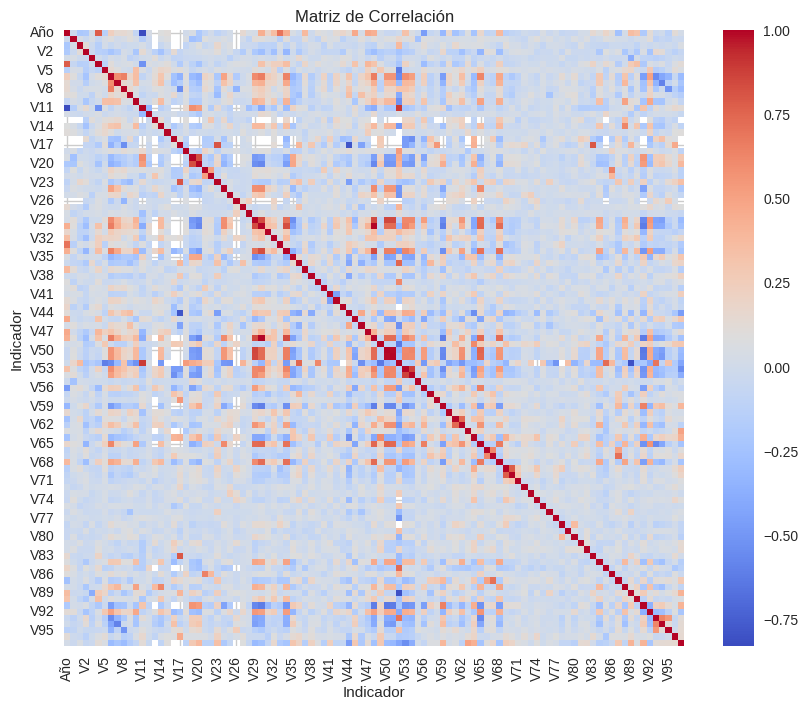

In [ ]:
#*********************************************************************************
#Matriz de correlación ***********************************************************
#*********************************************************************************

df_numeric = df_pivot.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr(method='pearson')

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
#********************************************************************************
#*********************************************************************************

In [ ]:
# Set the threshold
threshold = 0.6 ## segun criterio de Pearson, con las dos categorías de correlacion menor

# Create an empty list to store the pairs
high_correlation_pairs = []

# Iterate over the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if np.abs(correlation_matrix.iloc[i, j]) > threshold and correlation_matrix.columns[i] != "Año" and correlation_matrix.columns[j]  != "Año"\
            and correlation_matrix.columns[i] != "O1" and correlation_matrix.columns[j]  != "O1" \
            and correlation_matrix.columns[i] != "O2" and correlation_matrix.columns[j]  != "O2":
            colname1, colname2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            high_correlation_pairs.append((colname1, colname2))

j = 0
# Print the pairs with high correlation
for pair in high_correlation_pairs:
    print(j, pair)
    j = j + 1


0 ('V8', 'V6')
1 ('V20', 'V19')
2 ('V23', 'V17')
3 ('V29', 'V6')
4 ('V30', 'V6')
5 ('V30', 'V29')
6 ('V34', 'V6')
7 ('V34', 'V29')
8 ('V34', 'V30')
9 ('V44', 'V17')
10 ('V48', 'V6')
11 ('V48', 'V24')
12 ('V48', 'V29')
13 ('V48', 'V30')
14 ('V48', 'V34')
15 ('V50', 'V29')
16 ('V50', 'V30')
17 ('V50', 'V34')
18 ('V50', 'V48')
19 ('V51', 'V29')
20 ('V51', 'V30')
21 ('V51', 'V34')
22 ('V51', 'V48')
23 ('V51', 'V50')
24 ('V52', 'V5')
25 ('V52', 'V11')
26 ('V52', 'V36')
27 ('V52', 'V39')
28 ('V52', 'V49')
29 ('V53', 'V29')
30 ('V53', 'V30')
31 ('V53', 'V34')
32 ('V53', 'V48')
33 ('V53', 'V50')
34 ('V53', 'V51')
35 ('V54', 'V29')
36 ('V54', 'V50')
37 ('V54', 'V51')
38 ('V54', 'V53')
39 ('V59', 'V30')
40 ('V59', 'V48')
41 ('V62', 'V61')
42 ('V64', 'V49')
43 ('V65', 'V6')
44 ('V65', 'V24')
45 ('V65', 'V29')
46 ('V65', 'V30')
47 ('V65', 'V34')
48 ('V65', 'V48')
49 ('V65', 'V50')
50 ('V65', 'V51')
51 ('V65', 'V56')
52 ('V67', 'V66')
53 ('V68', 'V29')
54 ('V68', 'V30')
55 ('V68', 'V34')
56 ('V68',

In [ ]:
len(correlation_matrix.columns)


99

In [ ]:
#df_numeric_correlation = df_numeric

# Assuming 'df' is your DataFrame and 'high_correlation_pairs' is your list of pairs

# Extract the first variable from each pair
variables_to_drop = set(pair[0] for pair in high_correlation_pairs)

# Drop these variables from the DataFrame
df_numeric_correlation = df_numeric.drop(columns=variables_to_drop)
df_numeric_correlation

Indicador,Año,V0,V1,V2,V3,V4,V5,V6,V7,V9,...,V79,V80,V81,V82,V84,V90,V92,V95,O1,O2
0,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,NaN,NaN,-24.521204,7.03,3.746016,110.815615,NaN,NaN,100.000000,...,19.964026,32.898206,8.024755,110.976495,27.910735,4.272340,84.223668,0.420000,NaN,NaN
2,2011,NaN,NaN,-29.127469,7.03,6.570680,116.438727,NaN,NaN,100.000000,...,19.338936,32.602543,9.910002,105.161475,45.176321,3.939082,93.385783,0.530000,NaN,NaN
3,2012,NaN,NaN,-38.959540,7.03,11.244419,115.130513,NaN,NaN,100.000000,...,19.060624,33.885660,11.853622,104.691189,42.397654,3.692916,94.080123,0.400000,NaN,NaN
4,2013,19.381305,1.658296,-38.277198,7.03,13.800588,106.594602,98.227862,80.70005,100.000000,...,15.308032,34.473629,10.174241,100.062259,51.169645,3.469120,100.029149,0.000000,NaN,23.678642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,2018,NaN,NaN,16.046090,0.00,25.616173,36.210526,31.154890,0.00000,99.862841,...,0.000000,11.128422,22.256844,155.797908,0.000000,0.000000,8.190252,15.900000,192.307692,NaN
1749,2019,26.316477,1.219498,13.473454,0.00,35.002693,34.375000,26.433606,0.00000,100.000000,...,21.574973,26.968716,32.362460,183.387271,0.000000,0.000000,7.599623,16.335120,63.011972,66.459216
1750,2020,NaN,NaN,28.803033,0.00,81.290067,37.701149,35.906572,0.00000,100.000000,...,0.000000,21.050416,10.525208,126.302494,0.000000,0.000000,8.135616,17.588626,223.000956,NaN
1751,2021,-3.026480,1.095764,22.492464,0.00,108.504970,43.230404,0.000000,0.00000,100.000000,...,10.269049,15.403574,20.538098,92.421442,0.000000,0.000000,7.114547,24.700000,355.182435,38.859182


In [ ]:
print(variables_to_drop)
print(f"cantidad de variables eliminadas: {len(variables_to_drop)}")

{'V29', 'V85', 'V67', 'V53', 'V83', 'V59', 'V68', 'V64', 'V23', 'V89', 'V62', 'V44', 'V65', 'V70', 'V88', 'V48', 'V94', 'V20', 'V54', 'V50', 'V8', 'V87', 'V86', 'V52', 'V91', 'V51', 'V30', 'V34', 'V93'}
cantidad de variables eliminadas: 29


In [ ]:
dictVars

{'V0': 'Brecha de ingreso mensual promedio entre hombres y mujeres',
 'V1': 'Brecha de pobreza extrema urbano-rural',
 'V2': 'Brecha entre cobertura neta urbano-rural en educación básica y media',
 'V3': 'Capacidad instalada de generación de energía eléctrica',
 'V4': 'Cobertura de establecimientos financieros',
 'V5': 'Cobertura de vacunación con BCG en nacidos vivos',
 'V6': 'Cobertura de viviendas con agua potable',
 'V7': 'Cobertura de viviendas con agua potable (rural)',
 'V8': 'Cobertura de viviendas con agua potable (urbano)',
 'V9': 'Cobertura de viviendas con energía eléctrica',
 'V10': 'Cobertura en educación superior',
 'V11': 'Coeficiente de GINI',
 'V12': 'Crecimiento anual del Producto Interno Bruto (PIB) real per-cápita',
 'V13': 'Entidades territoriales con planes territoriales de cambio climático',
 'V14': 'Exportaciones totales como porcentaje del Producto Interno Bruto (PIB)',
 'V15': 'Hectáreas de pequeña y mediana propiedad rural, formalizadas',
 'V16': 'Hogares ur

In [ ]:
# Columnas o variables eliminadas, por criterio de Pearson > 0.3
variables_to_drop_sorted = sorted(variables_to_drop, key=lambda x: x[1])

#imprimirlas en orden
for col in variables_to_drop_sorted:
    if col[0] == 'V':
        print(f"{col}: {dictVars[col]}")

V29: Mujeres que habitan en hogares donde hay computador de escritorio-portátil
V23: Incidencia por malaria
V20: Incidencia de la pobreza monetaria moderada
V30: Mujeres que habitan en hogares donde hay internet
V34: Penetración de internet fijo
V44: Porcentaje de nacidos vivos con 4 o más controles prenatales
V48: Porcentaje de personas que usan internet
V53: Promedio puntaje prueba Saber 11 - Lectura crítica
V59: Tasa de analfabetismo para la población de 15 años y más
V54: Promedio puntaje prueba Saber 11 - Matemáticas
V50: Porcentaje de población ocupada afiliada a Administradora de riesgos laborales
V52: Porcentaje de puntos de monitoreo con categoría buena o aceptable del Índice de Calidad de Agua (ICA)
V51: Porcentaje de población ocupada cotizante al sistema de pensiones
V67: Tasa de homicidios (ocurrencia del hecho)
V68: Tasa de hurto a personas
V64: Tasa de fecundidad específica en mujeres adolescentes de 15 a 19 años
V62: Tasa de cobertura bruta nivel de preescolar
V65: Tasa

In [ ]:
len(variables_to_drop)

29

dictVars['V51'] 'Greys', 'Purples', 'Blues', 'Greens',


    'viridis', 'plasma', 'inferno', 'magma', 'cividis',
    'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    'YlGnBu', 'YlGn', 'YlOrBr', 'YlOrRd',
    'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
    'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
    'twilight', 'twilight_shifted', 'hsv',
    'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c',
    'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
    'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'

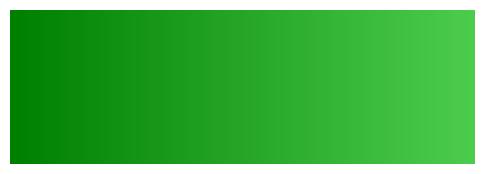

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Crear un colormap personalizado de tonos verdes que va de verde oscuro a verde claro menos brillante
colors = [(0.0, 0.5, 0.0), (0.3, 0.8, 0.3)]  # Colores de inicio y fin en RGB, invertidos
n_bins = 100  # Número de niveles de color
cmap_name = 'custom_greens'
custom_greens = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Mostrar la paleta de colores completa
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=custom_greens)
ax.set_axis_off()
plt.show()



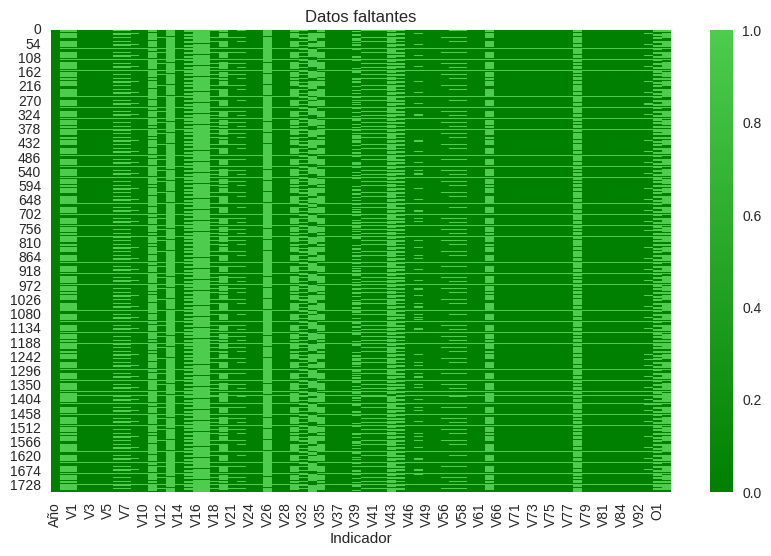

In [ ]:
# Establecer el tamaño de la figura
# EL COLOR MAS CLARO SON LOS DATOS FALTANTES
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric_correlation.isnull(), cmap=custom_greens)
plt.title('Datos faltantes')
plt.show()

In [ ]:
c = df_numeric_correlation.columns
d = c.drop(['Año', 'O1', 'O2'])
d[0]

'V0'

In [ ]:
# Imputación con un modelo predictivo a partir de los datos vecinos
from sklearn.impute import KNNImputer
# Se construye el modelo para la imputación de la estatura
imputer = KNNImputer(n_neighbors = 15, weights = "distance")  # Definir el imputador KNN
df_Imputed = df_numeric_correlation

# Variables a imputar V0 a V95
#variables_a_imputar = ["V" + str(i) for i in range(0, 96) if i not in [52]] # se excluyen las vbles eliminadas
variables_a_imputar = d

# Iterar sobre las variables a imputar
for variable in variables_a_imputar:
    # Si la variable tiene valores faltantes
    if df_Imputed[variable].isnull().any():
        # Ajustar y transformar los datos
        df_Imputed[variable] = imputer.fit_transform(df_Imputed[[variable]]).ravel() ###*****pilas


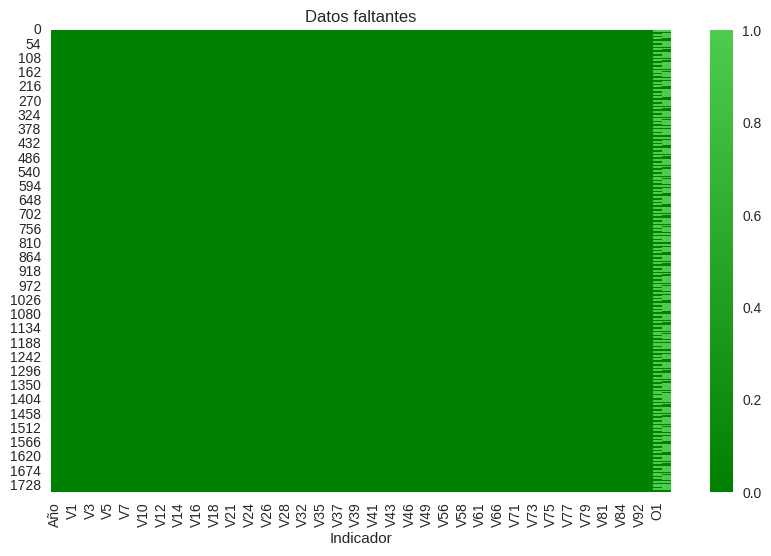

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 6))
#sns.heatmap(df_numeric_correlation.isnull(), cmap=custom_greens)
sns.heatmap(df_Imputed.isnull(), cmap=custom_greens)
plt.title('Datos faltantes')
plt.show()

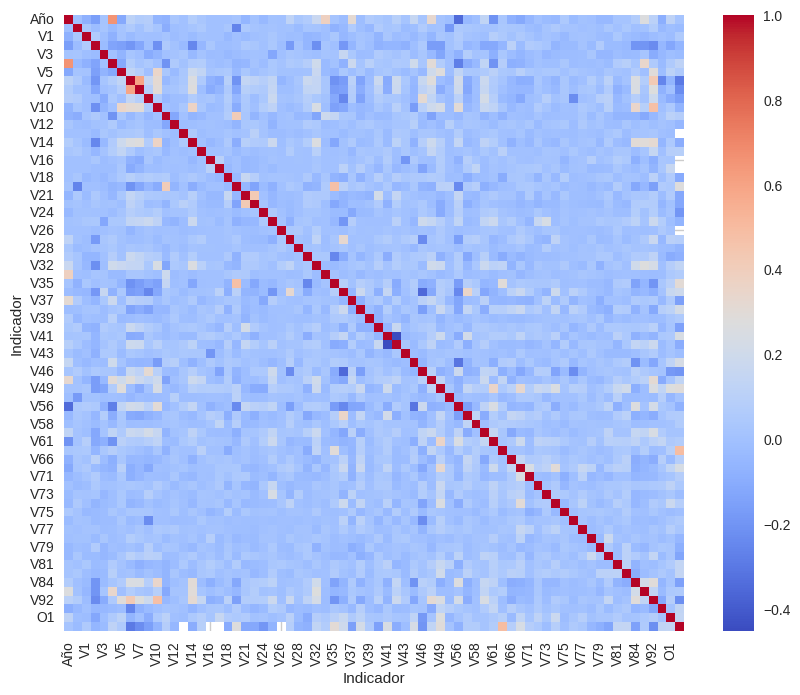

In [ ]:
#*********************************************************************************
#Matriz de correlación Inmputada *************************************************
#*********************************************************************************


# Calcular la matriz de correlación
correlation_matrix2 = df_Imputed.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=False, cmap='coolwarm', fmt=".2f")
#plt.title('Matriz de Correlación')
plt.show()
#********************************************************************************
#*********************************************************************************

In [ ]:
### HACER EL PROCESO DE LIMPIEZA UN PROCESO SEPARADO PARA CADA INDICADOR DE SALIDA ------ SEPARAR DropNAO1 y DropNAO2
### O1, 02
# Manejar los valores faltantes

# Quitar la columna 'O1' del DataFrame df_Imputed
df_ImputedDropNA_O2 = df_Imputed.drop(columns=['O1'])
# Eliminar las filas que contienen valores NaN
df_ImputedDropNA_O2 = df_ImputedDropNA_O2.dropna() #Limpiar en definitiva

# Quitar la columna 'O2' del DataFrame df_Imputed
df_ImputedDropNA_O1 = df_Imputed.drop(columns=['O2'])
# Eliminar las filas que contienen valores NaN
df_ImputedDropNA_O1 = df_ImputedDropNA_O1.dropna() #Limpiar en definitiva


df_ImputedDropNA_O1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Indicador,,,,,,,,
Año,750.0,2019.500000,1.708965,2017.000000,2018.000000,2019.500000,2021.000000,2022.000000
V0,750.0,9.353155,16.906977,-155.116244,9.625440,9.625440,11.348153,64.527276
V1,750.0,1.464859,1.258859,0.000000,1.001386,1.631606,1.631606,19.443506
V2,750.0,26.330750,49.518325,-194.156774,2.571613,25.168822,46.623866,323.683276
V3,750.0,42.008568,170.840632,0.000000,0.000000,0.000000,3.000000,1466.900000
...,...,...,...,...,...,...,...,...
V84,750.0,5.696956,20.423847,0.000000,0.000000,0.000000,0.000000,171.262202
V90,750.0,68.558356,185.886785,0.000000,0.000000,0.000000,44.813704,2344.166223
V92,750.0,37.295954,38.509944,0.000000,11.465008,21.331952,53.443807,255.521760


In [ ]:
df_ImputedDropNA_O2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Indicador,,,,,,,,
Año,500.0,2017.500000,2.961002,2013.000000,2016.000000,2018.000000,2019.500000,2021.000000
V0,500.0,9.625440,22.692120,-155.116244,2.286055,12.552559,22.595888,64.527276
V1,500.0,1.631606,2.846120,0.000000,0.410863,1.065083,1.742080,43.827010
V2,500.0,32.150462,51.044399,-184.739586,7.157899,30.301047,55.324672,372.916078
V3,500.0,40.439040,169.318694,0.000000,0.000000,0.000000,1.300000,1466.900000
...,...,...,...,...,...,...,...,...
V84,500.0,4.639445,18.949737,0.000000,0.000000,0.000000,0.000000,171.262202
V90,500.0,37.291463,134.636713,0.000000,0.000000,0.000000,0.000000,1787.916153
V92,500.0,35.232508,36.807874,0.000000,10.774463,20.525094,49.685375,255.521760


In [ ]:
# Columnas o variables incluidas para la construcción de los modelos
for col in df_ImputedDropNA_O2.columns:
    if col[0] == 'V':
        print(f"{col}: {dictVars[col]};")

V0: Brecha de ingreso mensual promedio entre hombres y mujeres;
V1: Brecha de pobreza extrema urbano-rural;
V2: Brecha entre cobertura neta urbano-rural en educación básica y media;
V3: Capacidad instalada de generación de energía eléctrica;
V4: Cobertura de establecimientos financieros;
V5: Cobertura de vacunación con BCG en nacidos vivos;
V6: Cobertura de viviendas con agua potable;
V7: Cobertura de viviendas con agua potable (rural);
V9: Cobertura de viviendas con energía eléctrica;
V10: Cobertura en educación superior;
V11: Coeficiente de GINI;
V12: Crecimiento anual del Producto Interno Bruto (PIB) real per-cápita;
V13: Entidades territoriales con planes territoriales de cambio climático;
V14: Exportaciones totales como porcentaje del Producto Interno Bruto (PIB);
V15: Hectáreas de pequeña y mediana propiedad rural, formalizadas;
V16: Hogares urbanos con déficit cualitativo de vivienda;
V17: Hogares urbanos con déficit cuantitativo de vivienda;
V18: Incidencia de intoxicaciones po

In [ ]:
#saber con cuáles años se está trabajando
print(df_numeric_correlation['Año'].unique())

[2007 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [ ]:
#saber con cuáles años se está trabajando
print(df_ImputedDropNA_O1['Año'].unique())

[2017 2018 2019 2020 2021 2022]


In [ ]:
#saber con cuáles años se está trabajando
print(df_ImputedDropNA_O2['Año'].unique())

[2013 2017 2019 2021]


In [ ]:
#Binning por cuantiles
#import pandas as pd

# Supongamos que 'data' es un DataFrame y 'incidencia_desnutricion_aguda' es la columna con los datos continuos
# Supongamos que 'df_numeric_DropNA' es un DataFrame y 'O1' es la columna con los datos continuos
#saber con cuáles años se está trabajando
df_ImputedDropNA_O1['O1_bins'], bin_edges = pd.qcut(df_ImputedDropNA_O1['O1'], q = 3, labels = ['Leve', 'Moderado', 'Alto'], retbins = True)

df_ImputedDropNA_O2['O2_bins'], bin_edges = pd.qcut(df_ImputedDropNA_O2['O2'], q = 3, labels = ['Leve', 'Moderado', 'Alto'], retbins = True)



In [ ]:
df_ImputedDropNA_O1.head(5)['O1_bins']

8         Alto
9         Alto
10        Alto
11    Moderado
12        Alto
Name: O1_bins, dtype: category
Categories (3, object): ['Leve' < 'Moderado' < 'Alto']

In [ ]:
df_ImputedDropNA_O2.head(5)['O2_bins']

4     Moderado
8         Leve
10    Moderado
12        Alto
18    Moderado
Name: O2_bins, dtype: category
Categories (3, object): ['Leve' < 'Moderado' < 'Alto']

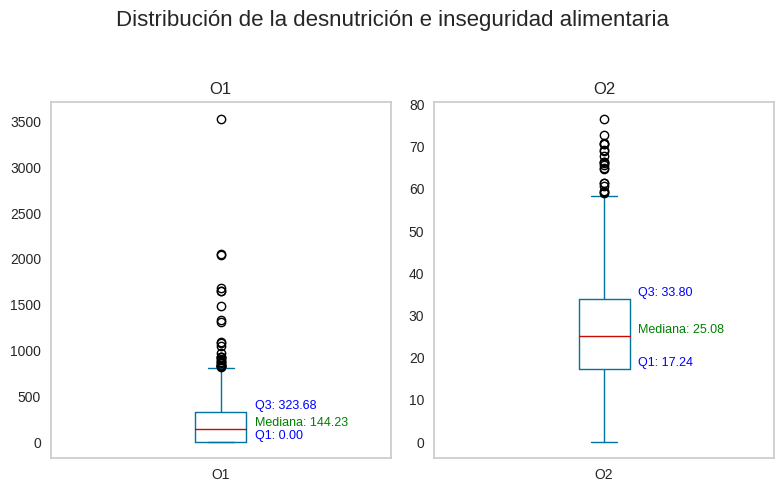

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y dos subgráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Trazar el primer diagrama de caja en el primer subgráfico
boxplot1 = df_ImputedDropNA_O1['O1'].plot(kind='box', ax=axes[0], title='O1')

# Agregar etiquetas a los cuartiles y a la mediana en el primer diagrama de caja
medians = df_ImputedDropNA_O1['O1'].median()
q1 = df_ImputedDropNA_O1['O1'].quantile(0.25)
q3 = df_ImputedDropNA_O1['O1'].quantile(0.75)
axes[0].text(1.1, medians, f'Mediana: {medians:.2f}', verticalalignment='bottom', horizontalalignment='left', color='green', fontsize=9)
axes[0].text(1.1, q1, f'Q1: {q1:.2f}', verticalalignment='bottom', horizontalalignment='left', color='blue', fontsize=9)
axes[0].text(1.1, q3, f'Q3: {q3:.2f}', verticalalignment='bottom', horizontalalignment='left', color='blue', fontsize=9)

# Eliminar las líneas de la cuadrícula en el primer subgráfico
axes[0].grid(False)

# Trazar el segundo diagrama de caja en el segundo subgráfico
boxplot2 = df_ImputedDropNA_O2['O2'].plot(kind='box', ax=axes[1], title='O2')

# Agregar etiquetas a los cuartiles y a la mediana en el segundo diagrama de caja
medians2 = df_ImputedDropNA_O2['O2'].median()
q1_2 = df_ImputedDropNA_O2['O2'].quantile(0.25)
q3_2 = df_ImputedDropNA_O2['O2'].quantile(0.75)
axes[1].text(1.1, medians2, f'Mediana: {medians2:.2f}', verticalalignment='bottom', horizontalalignment='left', color='green', fontsize=9)
axes[1].text(1.1, q1_2, f'Q1: {q1_2:.2f}', verticalalignment='bottom', horizontalalignment='left', color='blue', fontsize=9)
axes[1].text(1.1, q3_2, f'Q3: {q3_2:.2f}', verticalalignment='bottom', horizontalalignment='left', color='blue', fontsize=9)

# Eliminar las líneas de la cuadrícula en el segundo subgráfico
axes[1].grid(False)

# Agregar título a toda la figura
fig.suptitle('Distribución de la desnutrición e inseguridad alimentaria', fontsize=16)
# Ajustar los espacios entre subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar para no sobreponer con el título
# Mostrar la figura
plt.show()


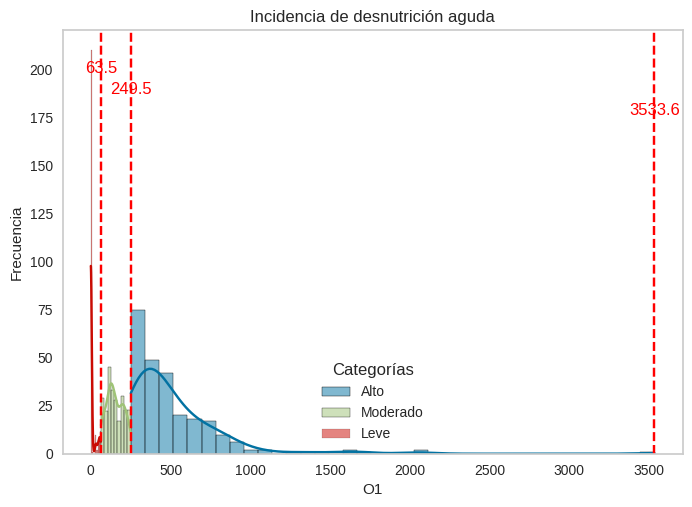

In [ ]:
# Crear el histograma de la variable continua categorizada
df_ImputedDropNA_O1['O1_bins'], bin_edges = pd.qcut(df_ImputedDropNA_O1['O1'], q=3, labels=['Leve', 'Moderado', 'Alto'], retbins=True)

# Crear el histograma de la variable continua categorizada
for label in df_ImputedDropNA_O1['O1_bins'].unique():
    subset = df_ImputedDropNA_O1[df_ImputedDropNA_O1['O1_bins'] == label]
    sns.histplot(subset['O1'], label=label, kde=True)

# Añadir líneas verticales para los puntos de corte (33.3%, 66.7% y 100%)
for i, bin_edge in enumerate(bin_edges[1:]):  # Ignorar el primer valor, que es el límite inferior
    plt.axvline(x=bin_edge, color='red', linestyle='--')
    # Ajustar la posición vertical de las etiquetas
    y_pos = plt.ylim()[1] * (0.9 if i == 0 else 0.85 if i == 1 else 0.8)
    plt.text(bin_edge, y_pos, f'{bin_edge:.1f}', color='red', ha='center')

#plt.xlabel('Incidencia de desnutrición aguda en población menor de 5 años (Continua)')
plt.ylabel('Frecuencia')
plt.title('Incidencia de desnutrición aguda')
plt.legend(title='Categorías')
# Eliminar las líneas de la cuadrícula
plt.grid(False)
plt.show()


In [ ]:
df_ImputedDropNA_O1['O1'].describe()

count     750.000000
mean      227.491591
std       295.224568
min         0.000000
25%         0.000000
50%       144.225855
75%       323.681217
max      3533.568905
Name: O1, dtype: float64

In [ ]:
df_ImputedDropNA_O2['O2'].describe()

count    500.000000
mean      26.651671
std       13.882069
min        0.000000
25%       17.242105
50%       25.082549
75%       33.800872
max       76.648924
Name: O2, dtype: float64

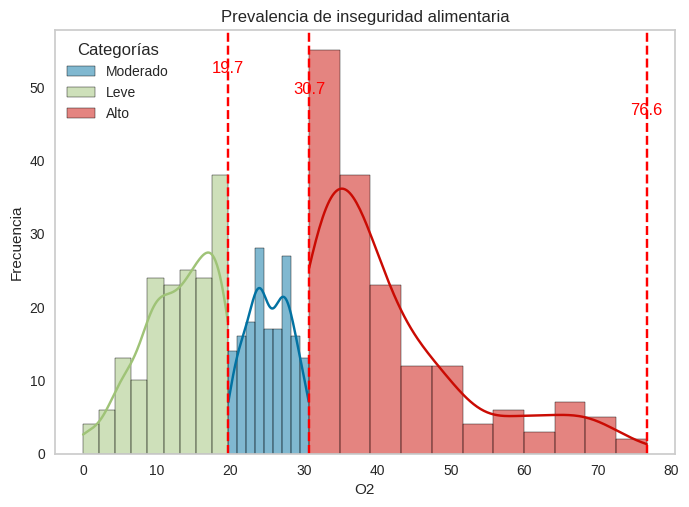

In [ ]:
# Crear el histograma de la variable continua categorizada
df_ImputedDropNA_O2['O2_bins'], bin_edges = pd.qcut(df_ImputedDropNA_O2['O2'], q=3, labels=['Leve', 'Moderado', 'Alto'], retbins=True)

# Crear el histograma de la variable continua categorizada
for label in df_ImputedDropNA_O2['O2_bins'].unique():
    subset = df_ImputedDropNA_O2[df_ImputedDropNA_O2['O2_bins'] == label]
    sns.histplot(subset['O2'], label=label, kde=True)

# Añadir líneas verticales para los puntos de corte (33.3%, 66.7% y 100%)
for i, bin_edge in enumerate(bin_edges[1:]):  # Ignorar el primer valor, que es el límite inferior
    plt.axvline(x=bin_edge, color='red', linestyle='--')
    # Ajustar la posición vertical de las etiquetas
    y_pos = plt.ylim()[1] * (0.9 if i == 0 else 0.85 if i == 1 else 0.8)
    plt.text(bin_edge, y_pos, f'{bin_edge:.1f}', color='red', ha='center')

#plt.xlabel('Prevalencia de inseguridad alimentaria en el hogar (moderada o severa)')
plt.ylabel('Frecuencia')
plt.title('Prevalencia de inseguridad alimentaria')
plt.legend(title='Categorías')
# Eliminar las líneas de la cuadrícula
plt.grid(False)
plt.show()

# **Pycaret**: Librería de código abierto, que facilita la generación de poco código, con OOP en lenguaje Python; la cual permite automatizar los flujos de trabajo en aprendizaje automático.(https://pycaret.org/)

In [ ]:
!pip install pycaret[models]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 M

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
# loading sample dataset from pycaret dataset module
#from pycaret.datasets import get_data
#data = get_data('iris')
dataO1 = df_ImputedDropNA_O1.drop(['O1', 'Año'], axis=1)
dataO2 = df_ImputedDropNA_O2.drop(['O2', 'Año'], axis=1)

In [ ]:
dataO1.head(10)

Indicador,V0,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V78,V79,V80,V81,V82,V84,V90,V92,V95,O1_bins
8,-0.231475,0.366505,-65.093212,7.03,23.714689,150.140786,99.824989,99.080000,100.000000,113.512609,...,3.426133,20.112855,35.444340,8.165476,111.652134,68.343300,36.823846,114.996487,1.000000,Alto
9,9.625440,1.631606,-71.665182,7.03,37.910586,140.330690,97.020284,83.800000,100.000000,116.212465,...,6.000000,17.285954,33.503384,9.398189,111.100016,45.321036,120.919333,117.666580,0.529000,Alto
10,9.354491,0.274955,-77.600649,8.03,36.612637,135.060635,98.461751,96.300000,100.000000,112.910536,...,6.200000,18.875723,33.104163,6.671592,113.986585,47.110079,354.277164,121.771887,1.739033,Alto
11,9.625440,1.631606,-92.202124,8.03,67.930976,125.643209,98.222383,94.260000,100.000000,110.522258,...,5.800000,15.576052,30.384186,10.807873,107.442969,45.245421,623.663997,121.559023,1.303320,Moderado
12,5.167586,0.324032,-99.791278,8.03,92.955999,120.803968,97.997850,92.134243,100.000000,116.360560,...,3.426133,14.612497,32.556405,10.026660,117.210879,49.430994,1085.273251,132.006870,1.180159,Alto
13,9.625440,1.631606,-105.140680,8.03,82.735805,130.229326,48.562717,13.419775,97.152977,114.222163,...,3.426133,16.381389,29.765927,7.924021,111.393447,81.248664,1675.097377,143.629725,4.718328,Alto
22,-21.723433,0.727264,23.853734,3.00,11.444729,29.901961,29.890191,0.000000,100.000000,8.524788,...,3.426133,19.932230,39.864461,19.932230,149.491728,0.000000,0.000000,82.402047,0.100000,Moderado
23,9.625440,1.631606,24.006505,3.00,21.501041,23.762376,42.039847,1.209329,100.000000,0.000000,...,0.000000,29.761905,24.801587,0.000000,158.730159,0.000000,0.000000,79.614325,0.100000,Moderado
24,13.501005,0.101119,10.276433,3.00,23.535741,27.127660,40.578029,0.000000,100.000000,0.000000,...,0.000000,9.925558,19.851117,29.776675,138.957816,0.000000,61.996280,82.812185,0.000000,Moderado
25,9.625440,1.631606,11.983121,3.00,31.686498,31.428571,41.295170,0.000000,100.000000,0.000000,...,0.000000,9.521089,23.802723,9.521089,85.689803,0.000000,58.582308,81.272633,0.000000,Moderado


In [ ]:
dataO2.head(5)

Indicador,V0,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V78,V79,V80,V81,V82,V84,V90,V92,V95,O2_bins
4,19.381305,1.658296,-38.277198,7.03,13.800588,106.594602,98.227862,80.700050,100.000000,101.308942,...,3.426133,15.308032,34.473629,10.174241,100.062259,51.169645,3.469120,100.029149,0.000000,Moderado
8,-0.231475,0.366505,-65.093212,7.03,23.714689,150.140786,99.824989,99.080000,100.000000,113.512609,...,3.426133,20.112855,35.444340,8.165476,111.652134,68.343300,36.823846,114.996487,1.000000,Leve
10,9.354491,0.274955,-77.600649,8.03,36.612637,135.060635,98.461751,96.300000,100.000000,112.910536,...,6.200000,18.875723,33.104163,6.671592,113.986585,47.110079,354.277164,121.771887,1.739033,Moderado
12,5.167586,0.324032,-99.791278,8.03,92.955999,120.803968,97.997850,92.134243,100.000000,116.360560,...,3.426133,14.612497,32.556405,10.026660,117.210879,49.430994,1085.273251,132.006870,1.180159,Alto
18,20.502836,0.531500,71.721935,3.00,6.773691,61.732852,32.855514,0.000000,98.842135,7.602664,...,3.426133,0.000000,30.275507,10.091836,70.642850,0.000000,0.000000,66.751747,2.100000,Moderado


**Escalamiento**

In [ ]:
from sklearn.preprocessing import StandardScaler
Dx = dataO1.drop('O1_bins', axis=1)
Dy = dataO1['O1_bins']

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar las características
X_scaled = scaler.fit_transform(Dx)

# Convertir X_scaled de nuevo a un DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=Dx.columns)

# Combinar las características escaladas con la columna objetivo
dataO1_scaled = pd.concat([X_scaled, Dy.reset_index(drop=True)], axis=1)
dataO1_scaled.head(10)



,V0,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V78,V79,V80,V81,V82,V84,V90,V92,V95,O1_bins
0,-0.567282,-0.873081,-1.847497,-0.204880,-0.892724,1.475546,2.168902,3.852858,0.339925,4.212196,...,-1.232199e-16,0.195550,0.941107,-0.257090,0.059075,3.069361,-0.170833,2.019021,-0.262803,Alto
1,0.016116,0.132548,-1.980304,-0.204880,-0.512116,1.337785,2.039708,3.147752,0.339925,4.320948,...,3.570810e-01,0.044022,0.812805,-0.183989,0.048226,1.941384,0.281870,2.088402,-0.320349,Alto
2,0.000079,-0.945855,-2.100248,-0.199023,-0.546916,1.263779,2.106107,3.724573,0.339925,4.187944,...,3.848276e-01,0.129237,0.786415,-0.345679,0.104943,2.029038,1.538084,2.195077,-0.172509,Alto
3,0.016116,0.132548,-2.395315,-0.199023,0.292763,1.131532,2.095081,3.630436,0.339925,4.091743,...,3.293343e-01,-0.047633,0.606618,-0.100394,-0.023629,1.937679,2.988249,2.189546,-0.225743,Moderado
4,-0.247730,-0.906843,-2.548677,-0.199023,0.963712,1.063575,2.084738,3.532341,0.339925,4.326914,...,-1.232199e-16,-0.099282,0.750207,-0.146720,0.168295,2.142751,5.473188,2.461030,-0.240791,Alto
5,0.016116,0.132548,-2.656777,-0.199023,0.689697,1.195934,-0.192421,-0.099991,-0.081206,4.240778,...,-1.232199e-16,-0.004465,0.565749,-0.271408,0.053992,3.701660,8.648335,2.763046,0.191497,Alto
6,-1.839319,-0.586314,-0.050056,-0.228485,-1.221695,-0.212944,-1.052544,-0.719255,0.339925,-0.016792,...,-1.232199e-16,0.185868,1.233288,0.440688,0.802563,-0.279123,-0.369064,1.172066,-0.372763,Moderado
7,0.016116,0.132548,-0.046968,-0.228485,-0.952074,-0.299161,-0.492887,-0.663450,0.339925,-0.360177,...,-4.753187e-01,0.712763,0.237594,-0.741309,0.984084,-0.279123,-0.369064,1.099628,-0.372763,Moderado
8,0.245497,-1.084037,-0.324426,-0.228485,-0.897522,-0.251903,-0.560224,-0.719255,0.339925,-0.360177,...,-4.753187e-01,-0.350513,-0.089645,1.024472,0.595589,-0.279123,-0.035325,1.182723,-0.384981,Moderado
9,0.016116,0.132548,-0.289937,-0.228485,-0.678991,-0.191506,-0.527190,-0.719255,0.339925,-0.360177,...,-4.753187e-01,-0.372194,0.171566,-0.176701,-0.451044,-0.279123,-0.053703,1.142719,-0.384981,Moderado


In [ ]:

Dx = dataO2.drop('O2_bins', axis=1)
Dy = dataO2['O2_bins']

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar las características
X_scaled = scaler.fit_transform(Dx)

# Convertir X_scaled de nuevo a un DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=Dx.columns)

# Combinar las características escaladas con la columna objetivo
dataO2_scaled = pd.concat([X_scaled, Dy.reset_index(drop=True)], axis=1)
dataO2_scaled.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V78,V79,V80,V81,V82,V84,V90,V92,V95,O2_bins
0,0.430354,0.009387,-1.381115,-0.197512,-0.777944,0.853830,1.923796,2.932286,0.367966,3.786260,...,0.027614,-0.020891,1.007666,-0.133295,-0.144473,2.457913,-0.251463,1.762165,-0.341267,Moderado
1,-0.434811,-0.444945,-1.906988,-0.197512,-0.491146,1.542798,1.986964,3.744359,0.367966,4.292930,...,0.027614,0.249008,1.077720,-0.254170,0.079917,3.365094,-0.003477,2.169206,-0.246322,Leve
2,-0.011952,-0.477144,-2.152264,-0.191600,-0.118030,1.304207,1.933046,3.621531,0.367966,4.267933,...,0.612624,0.179515,0.908835,-0.344063,0.125114,2.243470,2.356736,2.353465,-0.176155,Moderado
3,-0.196646,-0.459884,-2.587431,-0.191600,1.511889,1.078644,1.914698,3.437478,0.367966,4.411171,...,0.027614,-0.059961,0.869305,-0.142175,0.187539,2.366070,7.791570,2.631809,-0.229217,Alto
4,0.479827,-0.386916,0.776013,-0.221337,-0.981221,0.144047,-0.661775,-0.633246,0.215787,-0.104221,...,0.027614,-0.880781,0.704698,-0.138254,-0.714058,-0.245074,-0.277256,0.857175,-0.141883,Moderado


In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
exp.setup(dataO1_scaled, target = 'O1_bins', session_id = 123)

,Description,Value
0,Session id,123
1,Target,O1_bins
2,Target type,Multiclass
3,Target mapping,"Alto: 0, Leve: 1, Moderado: 2"
4,Original data shape,"(750, 68)"
5,Transformed data shape,"(750, 68)"
6,Transformed train set shape,"(525, 68)"
7,Transformed test set shape,"(225, 68)"
8,Numeric features,67
9,Preprocess,True


In [ ]:
# Comparar modelos y seleccionar los 5 mejores
exp.compare_models()



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5602,0.7389,0.5602,0.5610,0.5560,0.3403,0.3429,0.2480
rf,Random Forest Classifier,0.5427,0.7281,0.5427,0.5461,0.5375,0.3140,0.3181,0.3550
catboost,CatBoost Classifier,0.5220,0.7241,0.5220,0.5324,0.5213,0.2833,0.2865,35.8750
xgboost,Extreme Gradient Boosting,0.5143,0.7010,0.5143,0.5203,0.5128,0.2714,0.2740,1.2820
lightgbm,Light Gradient Boosting Machine,0.5087,0.7053,0.5087,0.5105,0.5066,0.2630,0.2645,2.4780
gbc,Gradient Boosting Classifier,0.5009,0.0000,0.5009,0.5022,0.4961,0.2521,0.2548,2.1750
nb,Naive Bayes,0.4955,0.6536,0.4955,0.5183,0.4714,0.2428,0.2628,0.0500
ada,Ada Boost Classifier,0.4761,0.0000,0.4761,0.4806,0.4733,0.2145,0.2167,0.4360
qda,Quadratic Discriminant Analysis,0.4722,0.0000,0.4722,0.4981,0.4501,0.2071,0.2217,0.0800
lr,Logistic Regression,0.4669,0.0000,0.4669,0.4691,0.4633,0.2005,0.2026,0.9030


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [ ]:
exp.setup(dataO2_scaled, target = 'O2_bins', session_id = 135)

,Description,Value
0,Session id,135
1,Target,O2_bins
2,Target type,Multiclass
3,Target mapping,"Alto: 0, Leve: 1, Moderado: 2"
4,Original data shape,"(500, 68)"
5,Transformed data shape,"(500, 68)"
6,Transformed train set shape,"(350, 68)"
7,Transformed test set shape,"(150, 68)"
8,Numeric features,67
9,Preprocess,True


In [ ]:
# Comparar modelos y seleccionar los 5 mejores
exp.compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6486,0.8104,0.6486,0.6625,0.6473,0.4722,0.4775,0.5580
et,Extra Trees Classifier,0.6400,0.8099,0.6400,0.6510,0.6403,0.4593,0.4628,0.2270
xgboost,Extreme Gradient Boosting,0.6314,0.8085,0.6314,0.6414,0.6311,0.4465,0.4502,0.9130
lightgbm,Light Gradient Boosting Machine,0.6286,0.8079,0.6286,0.6406,0.6288,0.4426,0.4464,0.6540
catboost,CatBoost Classifier,0.6143,0.8137,0.6143,0.6252,0.6125,0.4208,0.4259,30.9010
gbc,Gradient Boosting Classifier,0.6029,0.0000,0.6029,0.6228,0.6045,0.4038,0.4087,1.6720
svm,SVM - Linear Kernel,0.6000,0.0000,0.6000,0.6043,0.5981,0.3991,0.4019,0.0610
ridge,Ridge Classifier,0.5971,0.0000,0.5971,0.6084,0.5958,0.3949,0.3992,0.0490
lr,Logistic Regression,0.5943,0.0000,0.5943,0.6039,0.5944,0.3904,0.3934,0.5760
lda,Linear Discriminant Analysis,0.5771,0.0000,0.5771,0.5878,0.5768,0.3647,0.3682,0.0510


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=135, verbose=0,
                       warm_start=False)

In [ ]:
# Guardar datos preparados en archivo CSV
dataO1_scaled.to_csv('dataO1_scaled.csv', index=False)
dataO2_scaled.to_csv('dataO2_scaled.csv', index=False)